In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [19]:
imgBGR = cv2.imread("Image.jpg")

In [20]:
im_rgb = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
im_hsv = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV)
im_hls = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HLS)
im_YCrCb = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2YCrCb)

Text(0.5, 1.0, 'Cb')

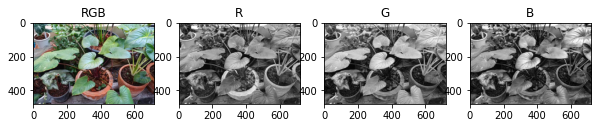

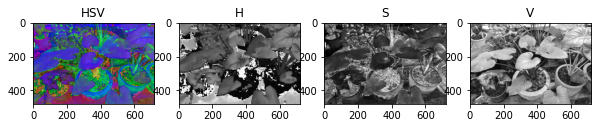

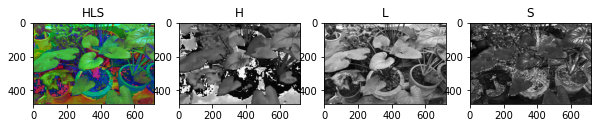

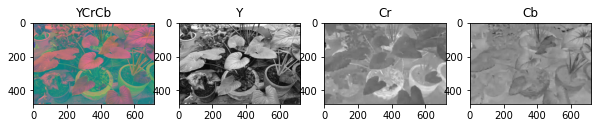

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plt.imshow(im_rgb)
plt.title('RGB')

plt.subplot(1,4,2)
a = plt.imshow(im_rgb[:,:,0],cmap = "gray")
plt.title('R')

plt.subplot(1,4,3)
a = plt.imshow(im_rgb[:,:,1],cmap = "gray")
plt.title('G')

plt.subplot(1,4,4)
a = plt.imshow(im_rgb[:,:,2],cmap = "gray")
plt.title('B')

plt.figure(figsize=(10,4))

a = plt.subplot(1,4,1)
plt.imshow(im_hsv)
plt.title('HSV')

plt.subplot(1,4,2)
a = plt.imshow(im_hsv[:,:,0],cmap = "gray")
plt.title('H')

plt.subplot(1,4,3)
a = plt.imshow(im_hsv[:,:,1],cmap = "gray")
plt.title('S')

plt.subplot(1,4,4)
a = plt.imshow(im_hsv[:,:,2],cmap = "gray")
plt.title('V')

plt.figure(figsize=(10,4))

a = plt.subplot(1,4,1)
plt.imshow(im_hls)
plt.title('HLS')

plt.subplot(1,4,2)
a = plt.imshow(im_hls[:,:,0],cmap = "gray")
plt.title('H')

plt.subplot(1,4,3)
a = plt.imshow(im_hls[:,:,1],cmap = "gray")
plt.title('L')

plt.subplot(1,4,4)
a = plt.imshow(im_hls[:,:,2],cmap = "gray")
plt.title('S')

plt.figure(figsize=(10,4))

a = plt.subplot(1,4,1)
plt.imshow(im_YCrCb)
plt.title('YCrCb')

plt.subplot(1,4,2)
a = plt.imshow(im_YCrCb[:,:,0],cmap = "gray")
plt.title('Y')

plt.subplot(1,4,3)
a = plt.imshow(im_YCrCb[:,:,1],cmap = "gray")
plt.title('Cr')

plt.subplot(1,4,4)
a = plt.imshow(im_YCrCb[:,:,2],cmap = "gray")
plt.title('Cb')

In [39]:
def additioncv(frames1,frames2,weight):
    cframe1 = frames1.copy()
    cframe2 = frames2.copy()
    cframe1[:,:,0] = cv2.add(weight[0]*cframe1[:,:,0],weight[1]*cframe2[:,:,0])
    cframe1[:,:,1] = cv2.add(weight[0]*cframe1[:,:,1],weight[1]*cframe2[:,:,1])
    cframe1[:,:,2] = cv2.add(weight[0]*cframe1[:,:,2],weight[1]*cframe2[:,:,2])

    return cframe1
            
def write_video(file_path, frames1 , frames2 , fps ,weight):
    """
    Writes frames to an mp4 video file
    :param file_path: Path to output video, must end with .mp4
    :param frames: List of PIL.Image objects
    :param fps: Desired frame rate
    """
    height, width, layers = frames1.shape
    size = (width,height)
    time = fps * 10
    writer = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in range(0,time,1):
        #writer.write(cv2.addWeighted(frames1,(1-(i/(time//2))),frames2,(i/(time//2)),0))
        writer.write(additioncv(frames1,frames2,weight[i]))
    writer.release()

In [34]:
a = 1.0
b = 0.0
array = []
for i in range(0,300,1):
    array.append([a,b])
    a = a - 0.0033333
    b = b + 0.0033333
array.append([0,1])

a = 0.0
b = 1.0
for i in range(0,300,1):
    array.append([a,b])
    a = a + 0.00333333
    b = b - 0.00333333
array.append([1,0])

In [40]:
imgC1 = cv2.imread("Chamber.jpg")
imgC2 = cv2.imread("Chamber2.jpg")
write_video("lel.avi",imgC1,imgC2,60,array)

Text(0.5, 1.0, 'masked')

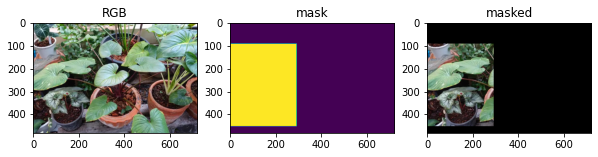

In [30]:
mask = np.zeros(im_rgb.shape[:2], dtype="uint8")
#cv2.rectangle(image, start_point, end_point, color, thickness)
#image: It is the image on which rectangle is to be drawn.
#start_point: It is the starting coordinates of rectangle. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).
#end_point: It is the ending coordinates of rectangle. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).
#color: It is the color of border line of rectangle to be drawn. For BGR, we pass a tuple. eg: (255, 0, 0) for blue color.
#thickness: It is the thickness of the rectangle border line in px. Thickness of -1 px will fill the rectangle shape by the specified color.
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.imshow(im_rgb)
plt.title('RGB')

plt.subplot(1,3,2)
plt.imshow(mask)
plt.title('mask')

masked = cv2.bitwise_and(im_rgb, im_rgb, mask=mask)

plt.subplot(1,3,3)
plt.imshow(masked)
plt.title('masked')
